<a href="https://colab.research.google.com/github/Harshith-0521/CNN_Classification/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import pandas as pd

expected_cols_for_images = 100 * 100 * 3
def load_data_robustly(filename, delimiter, expected_cols):
    try:
        return np.loadtxt(filename, delimiter=delimiter)
    except ValueError as e:
        if "number of columns changed" in str(e):
            print(f"Warning: '{filename}' has inconsistent column counts. Attempting to load with pandas.")
            df = pd.read_csv(filename, delimiter=delimiter, header=None)
            data_array = df.apply(pd.to_numeric, errors='coerce').fillna(0).values
            if data_array.shape[1] < expected_cols:
                print(f"Info: '{filename}' loaded with {data_array.shape[1]} columns. Padding to {expected_cols} columns.")
                padded_array = np.zeros((data_array.shape[0], expected_cols))
                padded_array[:, :data_array.shape[1]] = data_array
                return padded_array
            elif data_array.shape[1] > expected_cols:
                print(f"Warning: '{filename}' loaded with {data_array.shape[1]} columns. Truncating to {expected_cols} columns.")
                return data_array[:, :expected_cols]
            else:
                return data_array
        else:
            raise

# Load training data
X_train = load_data_robustly('input.csv', ',', expected_cols_for_images)
Y_train = np.loadtxt('labels.csv', delimiter=',')

# Load testing data
X_test = load_data_robustly('input_test.csv', ',', expected_cols_for_images)
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

# Ensure X_train and Y_train have the same number of samples
# Truncate Y_train to match the length of X_train if they differ
if len(X_train) != len(Y_train):
    min_len = min(len(X_train), len(Y_train))
    print(f"Warning: X_train and Y_train have different lengths. Truncating to {min_len} samples.")
    X_train = X_train[:min_len]
    Y_train = Y_train[:min_len]

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


In [ ]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)

shape of X_train: (2, 100, 100, 3)
shape of Y_train: (2, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


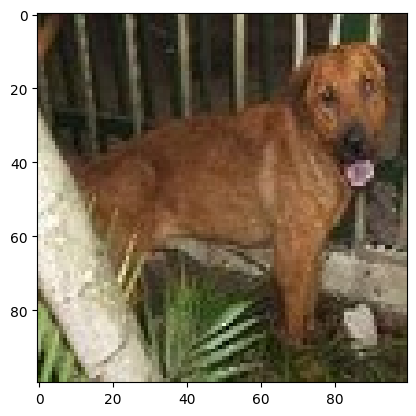

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.5947 - val_accuracy: 0.5000 - val_loss: 0.8693
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0883 - val_accuracy: 0.5000 - val_loss: 2.0605
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.5000 - val_loss: 4.0965
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 2.8313e-06 - val_accuracy: 0.5000 - val_loss: 6.4699
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.1081e-06 - val_accuracy: 0.5000 - val_loss: 9.0737
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1302e-11 - val_accuracy: 0.5000 - val_loss: 11.8139
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.7989e-13 - val_accuracy: 0.5000 - val_loss: 14.6265
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.1870e-13 - val_accuracy: 0.5000 - val_loss: 1

In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.7916 - loss: 23.9830


[57.46656799316406, 0.5]

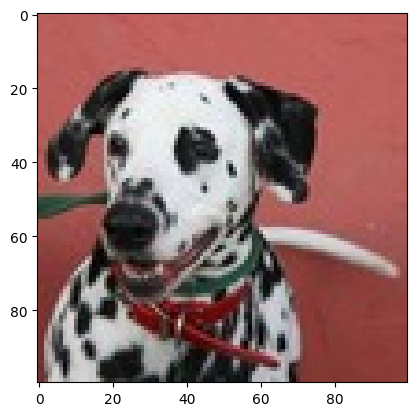

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
The model prediction is dog


In [ ]:
idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"

else:
    pred = 'cat'

print("The model prediction is", pred)


In [ ]:
model.save('model.h5')
print('our model is saved')

our model is saved
